In [44]:
# Neilson group plot formatting and packages
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
from matplotlib import gridspec
from pylab import * #imports matplotlib (and ???)


matplotlib.rc('font', **{'family':"sans-serif"})
matplotlib.rc('text.latex',preamble=r'\usepackage{sfmath}')

allSized = 18 #Whatever you want all the text size to be. 
matplotlib.rc('font',   size=     allSized,**{'family':"sans-serif"})     # controls default text sizes
matplotlib.rc('axes',   titlesize=allSized)     # fontsize of the axes title
matplotlib.rc('axes',   labelsize=allSized)    # fontsize of the x and y labels
matplotlib.rc('xtick',  labelsize=allSized)    # fontsize of the tick labels
matplotlib.rc('ytick',  labelsize=allSized)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize= allSized)    # legend fontsize
matplotlib.rc('figure', titlesize=allSized)  # fontsize of the figure title

In [45]:
#Goals:
#Import a .csv from the Miyake lab instrument
#break the spreadsheet down into the individual scan files
#calculate the Kubelka-Munk transformation
#Plot

In [46]:
#Import a .csv from the Miyake lab instrument
#Make a dictionary with each key as a scan name
#copied and modified from https://realpython.com/python-csv/
import csv
h = 4.13567E-15#plank's constant [eV•s]
c = 2.99792E8 #speed of light (m/s)
dataDict = {} #initialize dictionary to load in all data
with open('CLR_6N_029_UVV_20200320 6N_017 5N_045A 5N_087A MgZrN2.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0: #header row
            keys = list(filter(None, row))
            for key in keys:
                dataDict[key] = [[],[],[], [],[]] #instantiate 4 lists for each key (wavelength, %R, eV, k/S, (k/s)*hv)
            print(line_count)
            print(dataDict)
            print('\n')
            line_count += 1
        elif row == []: # stops counting once all data has been read in
            print(line_count)
            print('Break')
            break #This assumes that an empty row exists after all data has been read. 
        elif line_count == 1:
            line_count += 1
        else:
            #add the contents of the row to the appropriate dictionary
            for i in range(0,len(keys)): #iterate across all keys
                key = keys[i]
                wave = row[2*i]
                if  wave:
                    wave = float(wave)
                    dataDict[key][0].append(wave) #wavelengths
                    E = h*c/(wave*10**(-9))#E = hc/(wavelength in m) [eV]
                    dataDict[key][2].append(E) 
                R = row[2*i+1]
                if R: #today I learned that an empty string is considered "falsy"
                    #thanks internet https://stackoverflow.com/questions/9573244/how-to-check-if-the-string-is-empty
                    R = float(R)
                    dataDict[key][1].append(R) # reflectance %
                    R = R/100 #convert to decimal
                    KM = ((1-R)**2)/(2*R)
                    dataDict[key][3].append(KM)# Kubelka-Munk transformation
                    dataDict[key][4].append(KM*E)# (k/s)*E for bandgap calculation
                #how do I make sure there's an extra space for the K-M transformation?
            line_count += 1
    print(f'Processed {line_count} lines.')

0
{'Baseline 100%T': [[], [], [], [], []], 'Baseline 0%T': [[], [], [], [], []], 'CLR_6N_017A1': [[], [], [], [], []], 'CLR_6N_017A2': [[], [], [], [], []], 'CLR_6N_017A3': [[], [], [], [], []], 'CLR_6N_017B1': [[], [], [], [], []], 'CLR_6N_017B2': [[], [], [], [], []], 'CLR_6N_017B3': [[], [], [], [], []], 'CLR_6N_017C1': [[], [], [], [], []], 'CLR_6N_017C2': [[], [], [], [], []], 'CLR_6N_017C3': [[], [], [], [], []], 'CLR_6N_029A_redTape': [[], [], [], [], []], 'CLR_6N_017D1': [[], [], [], [], []], 'CLR_6N_017D2': [[], [], [], [], []], 'CLR_6N_017D3': [[], [], [], [], []], 'CLR_5N_087A': [[], [], [], [], []], 'CLR_5N_087A2': [[], [], [], [], []], 'CLR_5N_045A1': [[], [], [], [], []], 'CLR_5N_045A2': [[], [], [], [], []]}


454
Break
Processed 454 lines.


In [47]:
for key in keys:
    print(key)

Baseline 100%T
Baseline 0%T
CLR_6N_017A1
CLR_6N_017A2
CLR_6N_017A3
CLR_6N_017B1
CLR_6N_017B2
CLR_6N_017B3
CLR_6N_017C1
CLR_6N_017C2
CLR_6N_017C3
CLR_6N_029A_redTape
CLR_6N_017D1
CLR_6N_017D2
CLR_6N_017D3
CLR_5N_087A
CLR_5N_087A2
CLR_5N_045A1
CLR_5N_045A2


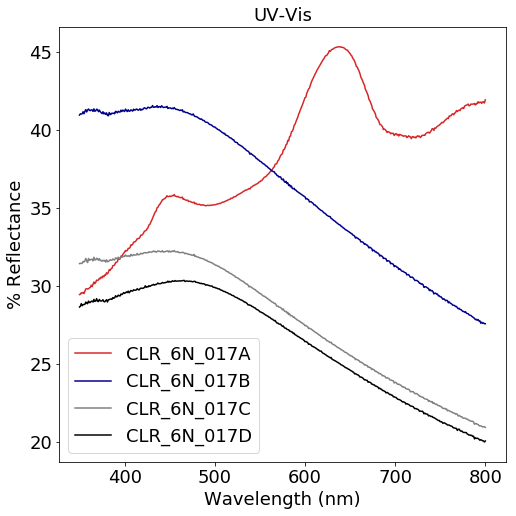

In [48]:
#dataDict[key][0] = wavelength
#dataDict[key][1] = reflectance
#dataDict[key][2] = k/s (via Kubelka-Munk)
fig = plt.figure(figsize=(8, 8)) 

plt.plot(dataDict['CLR_6N_017A1'][0], dataDict['CLR_6N_017A1'][1],  label = 'CLR_6N_017A', color = 'tab:red')
plt.plot(dataDict['CLR_6N_017B1'][0], dataDict['CLR_6N_017B1'][1],  label = 'CLR_6N_017B', color = 'darkblue')
plt.plot(dataDict['CLR_6N_017C1'][0], dataDict['CLR_6N_017C1'][1],  label = 'CLR_6N_017C', color = 'grey')
plt.plot(dataDict['CLR_6N_017D1'][0], dataDict['CLR_6N_017D1'][1],  label = 'CLR_6N_017D', color = 'black')

plt.legend(loc = 'best')

plt.title('UV-Vis')
plt.ylabel('% Reflectance')
plt.xlabel('Wavelength (nm)')
plt.show()

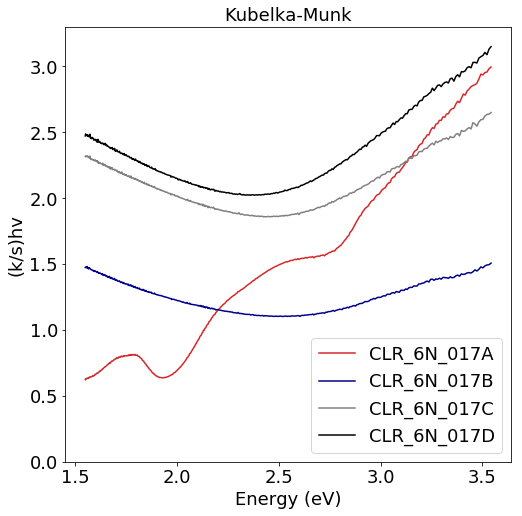

In [51]:
fig = plt.figure(figsize=(8, 8)) 

plt.plot(dataDict['CLR_6N_017A1'][2], dataDict['CLR_6N_017A1'][4],  label = 'CLR_6N_017A', color = 'tab:red')
plt.plot(dataDict['CLR_6N_017B1'][2], dataDict['CLR_6N_017B1'][4],  label = 'CLR_6N_017B', color = 'darkblue')
plt.plot(dataDict['CLR_6N_017C1'][2], dataDict['CLR_6N_017C1'][4],  label = 'CLR_6N_017C', color = 'grey')
plt.plot(dataDict['CLR_6N_017D1'][2], dataDict['CLR_6N_017D1'][4],  label = 'CLR_6N_017D', color = 'black')
plt.legend(loc = 'best')

plt.ylim(0, 3.3)
plt.ylabel('(k/s)hv')
plt.xlabel('Energy (eV)')
plt.title('Kubelka-Munk')
plt.show()

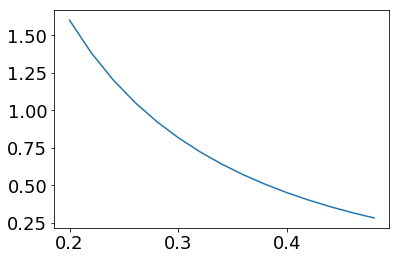

In [13]:
#testing Kubelka Munk
#k/s = (1-R)**2 / (2*R)
import numpy as np
R = np.arange(0.2, 0.5, 0.02)
KM = ((1-R)**2) / (2*R)
plt.plot(R, KM)
plt.show()